## Importing Libraries

In [1]:
# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import squarify

Defaulting to user installation because normal site-packages is not writeable


## Disable Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## Load Data

In [3]:
data = pd.read_csv("crime.csv")

In [4]:
data

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


## Data Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [6]:
data.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535976e+06,0.026210,0.023637,5.535976e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


In [7]:
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         IncidntNum  Category  Descript  DayOfWeek   Date   Time  PdDistrict  \
0            False     False     False      False  False  False       False   
1            False     False     False      False  False  False       False   
2            False     False     False      False  False  False       False   
3            False     False     False      False  False  False       False   
4            False     False     False      False  False  False       False   
...            ...       ...       ...        ...    ...    ...         ...   
150495       False     False     False      False  False  False       False   
150496       False     False     False      False  False  False       False   
150497       False     False     False      False  False  False       False   
150498       False     False     False      False  False  False       False   
150499       False     False     False      False  False  False      

In [8]:
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [10]:
data['PdDistrict'].fillna(data['PdDistrict'].mode()[0], inplace = True)
data.isnull().any()

IncidntNum    False
Category      False
Descript      False
DayOfWeek     False
Date          False
Time          False
PdDistrict    False
Resolution    False
Address       False
X             False
Y             False
Location      False
PdId          False
dtype: bool

## EDA

### Plotting a tree map

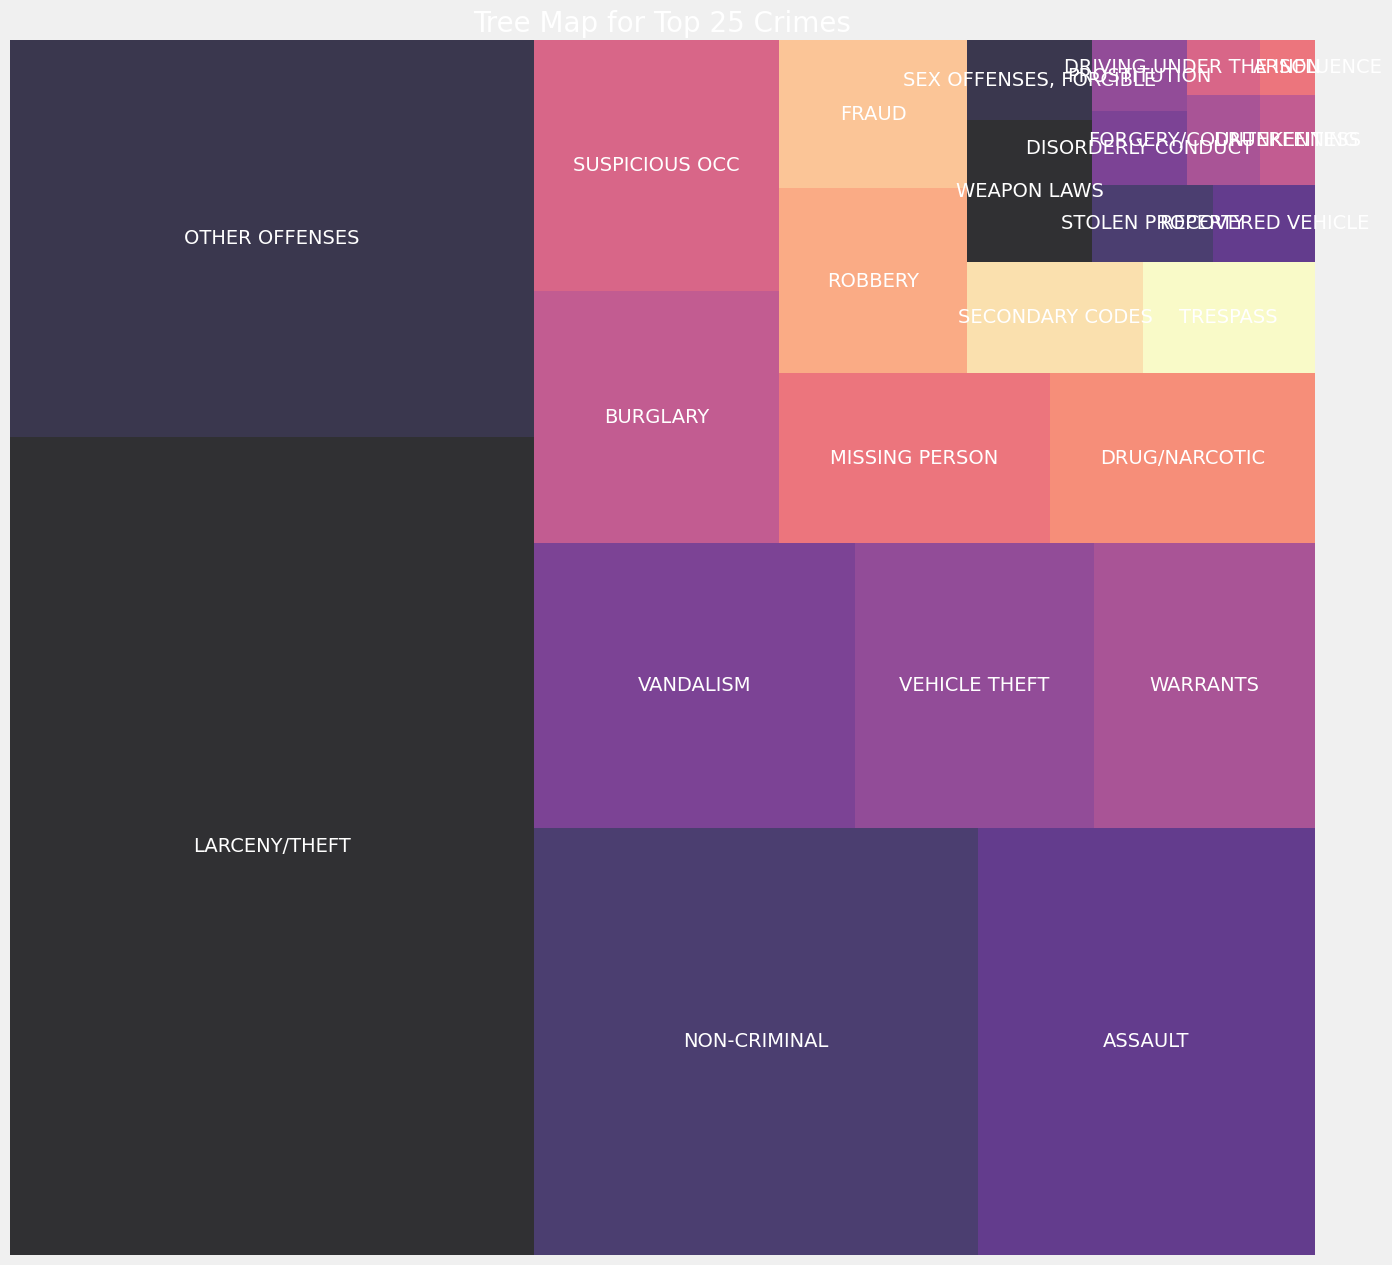

In [15]:
y = data['Category'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 25 Crimes', fontsize = 20)

plt.axis('off')
plt.show()

### Description of the Crime

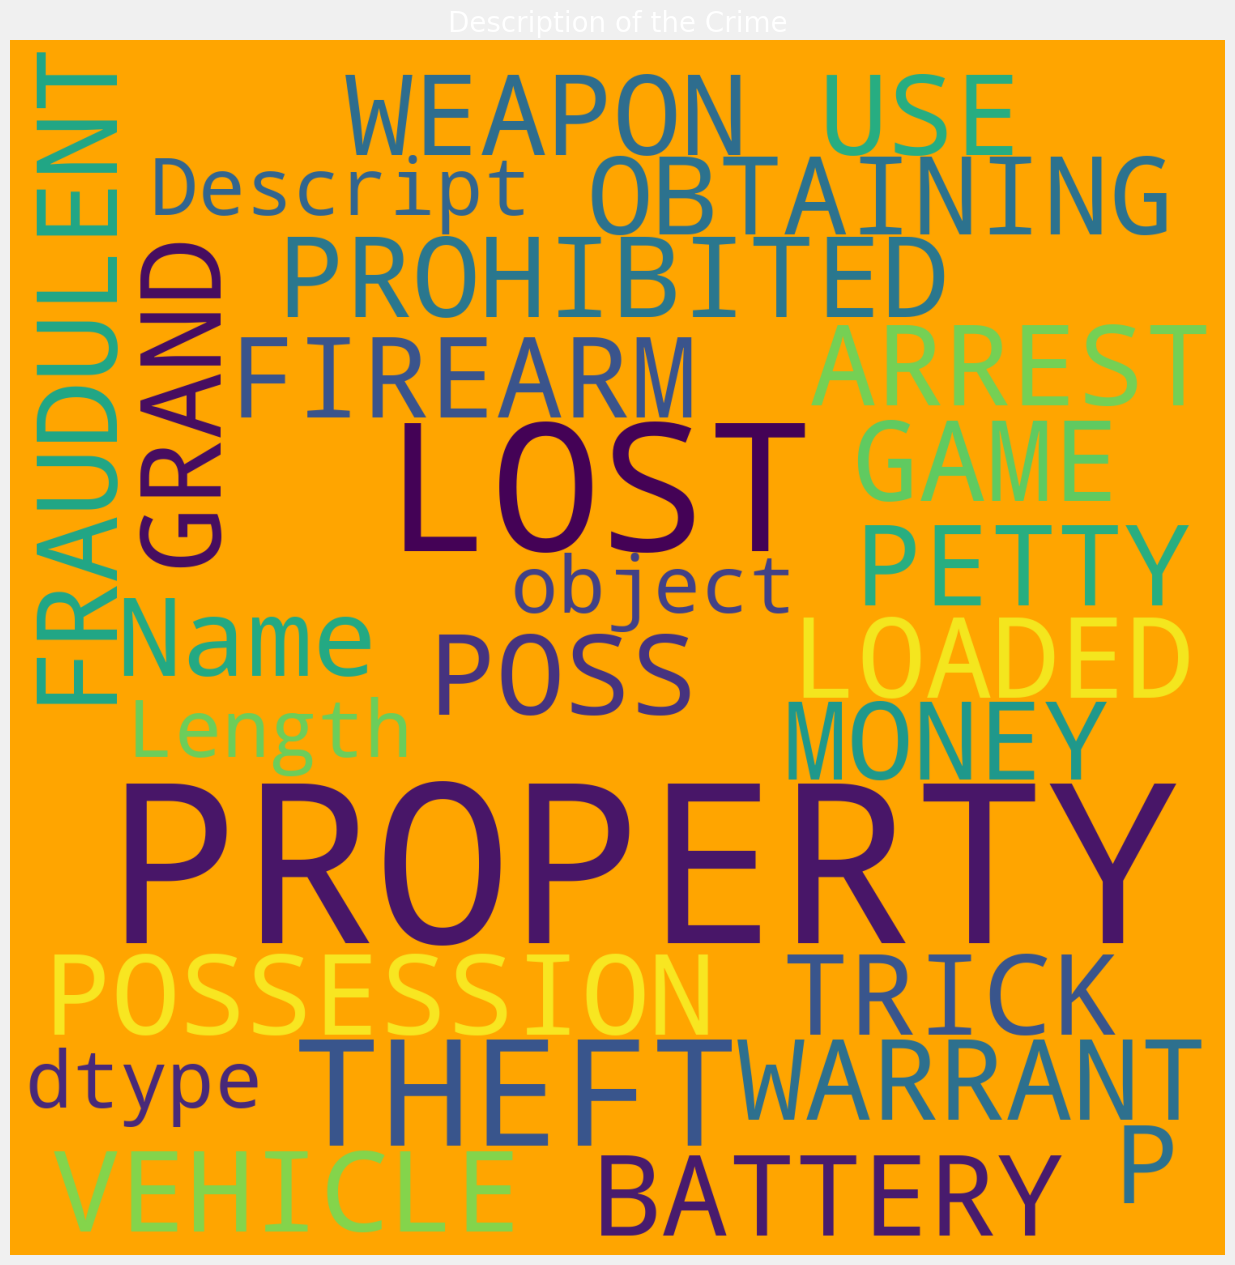

In [16]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(data['Descript']))
plt.title('Description of the Crime', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

### Regions with count of crimes

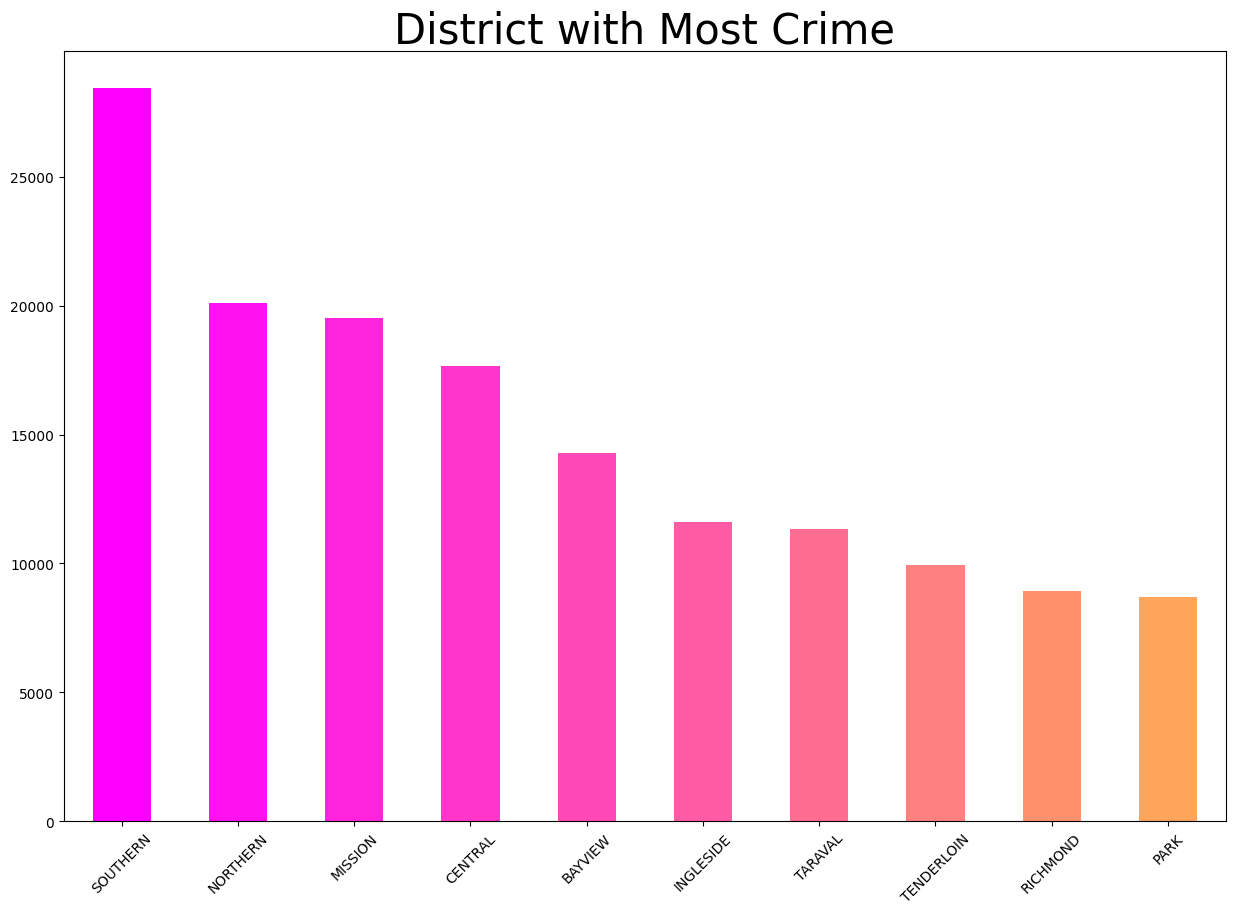

In [20]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('default')

color = plt.cm.spring(np.linspace(0, 1, 15))
data['PdDistrict'].value_counts().plot.bar(color = color, figsize = (15, 10))

plt.title('District with Most Crime',fontsize = 30)

plt.xticks(rotation = 45)
plt.show()

### Top 15 Addresses in San Francisco in Crime

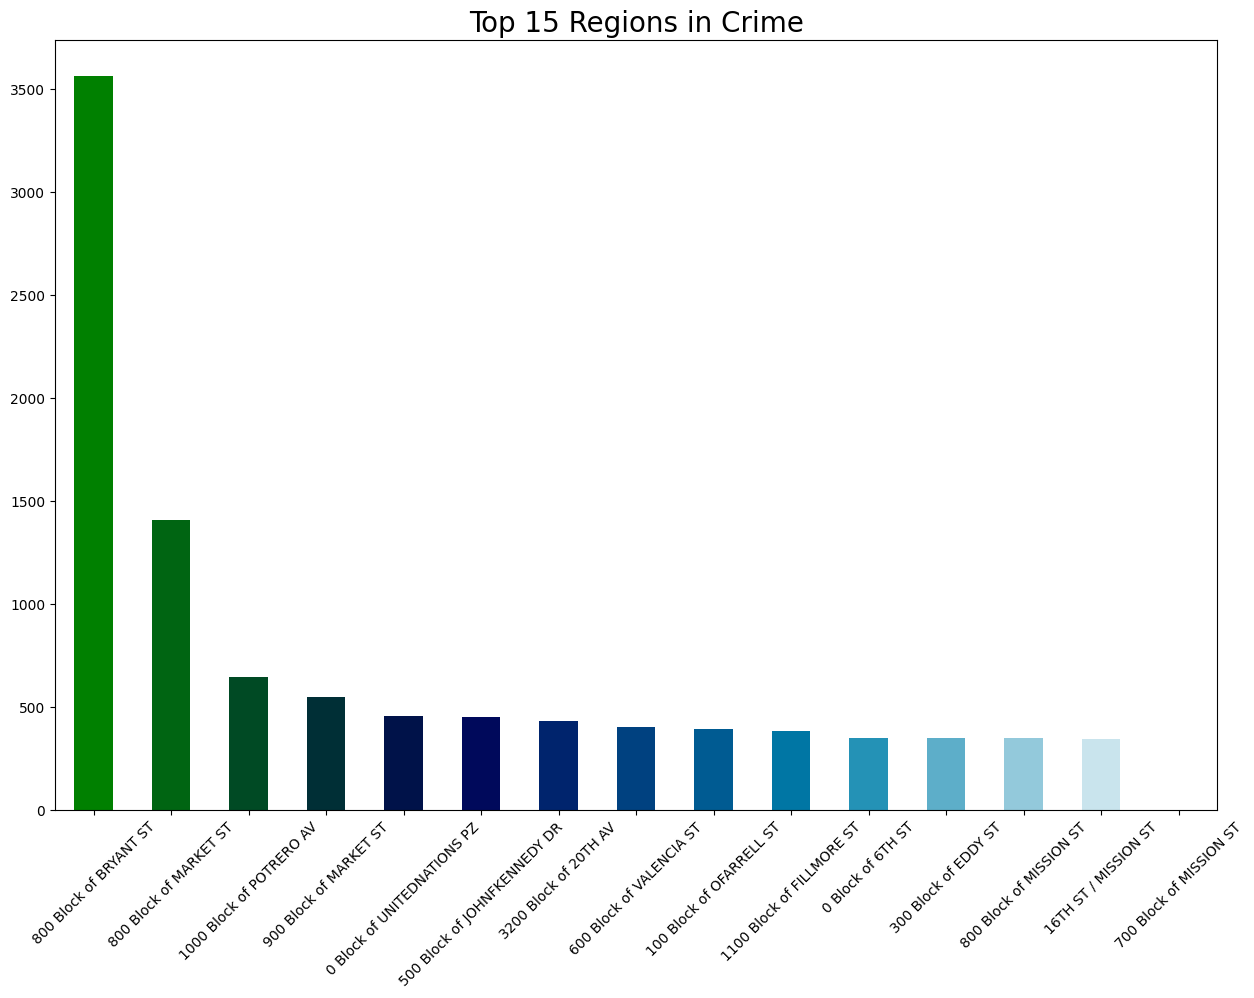

In [23]:
plt.rcParams['figure.figsize'] = (20, 9)

color = plt.cm.ocean(np.linspace(0, 1, 15))
data['Address'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 Regions in Crime',fontsize = 20)

plt.xticks(rotation = 45)
plt.show()

### Regions with days of crimes

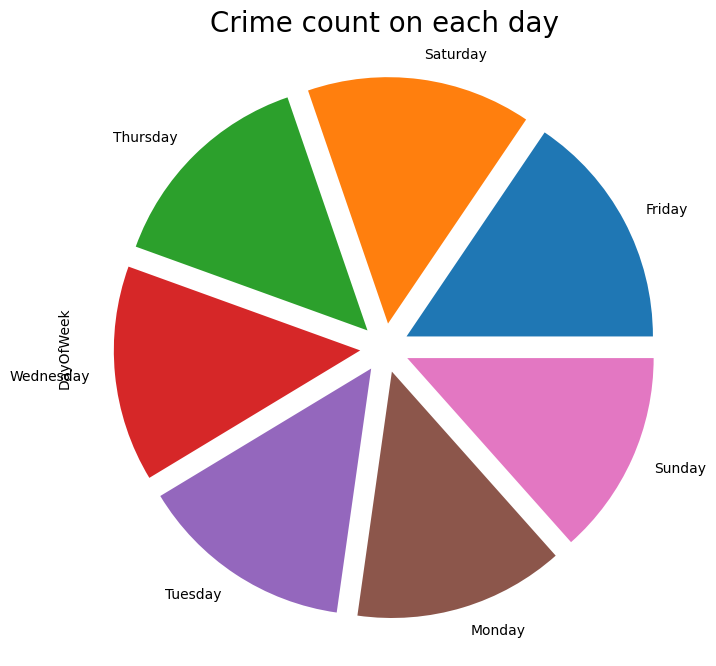

In [27]:
data['DayOfWeek'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Crime count on each day',fontsize = 20)

plt.xticks(rotation = 45)
plt.show()

### Crimes in Each Month

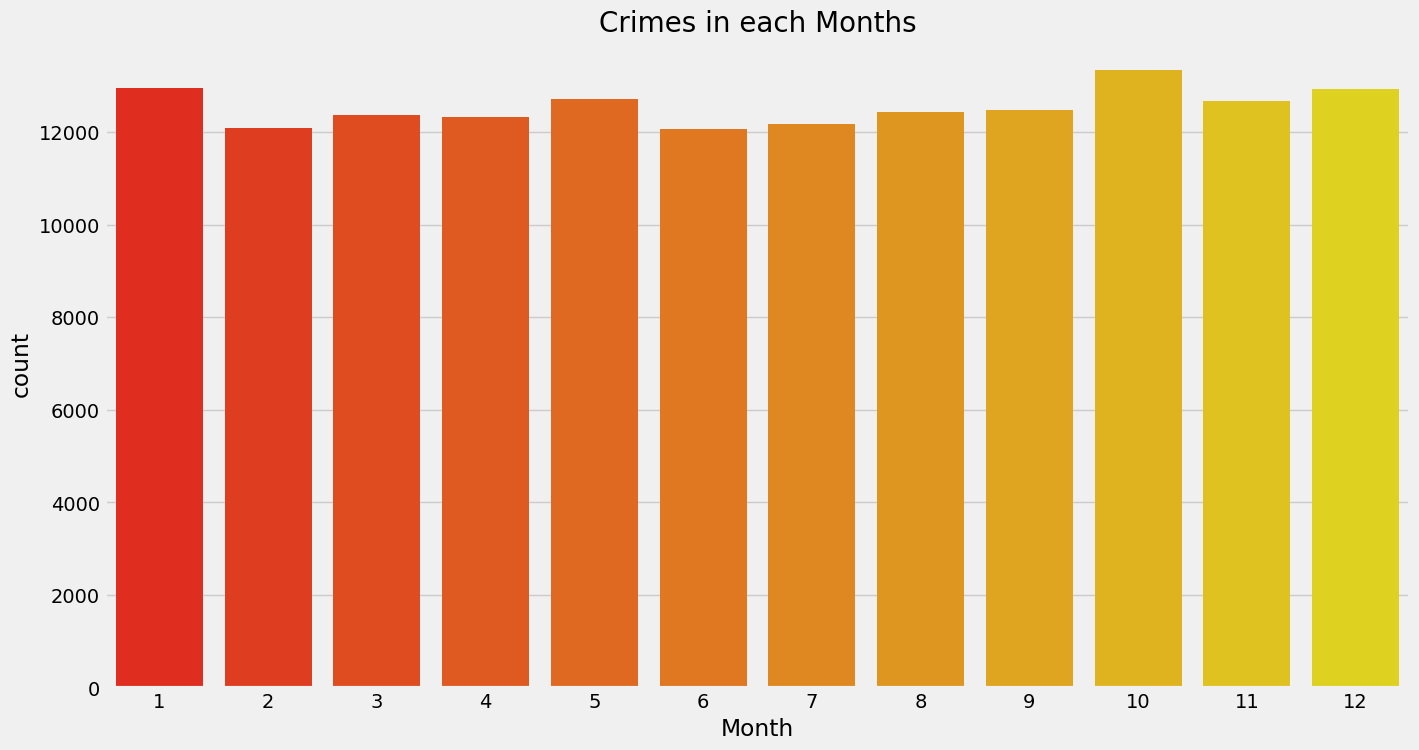

In [29]:
data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data['Date'].dt.month

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(x = data['Month'], palette = 'autumn',)
plt.title('Crimes in each Months', fontsize = 20)

plt.show()

### Checking the time at which crime occurs mostly

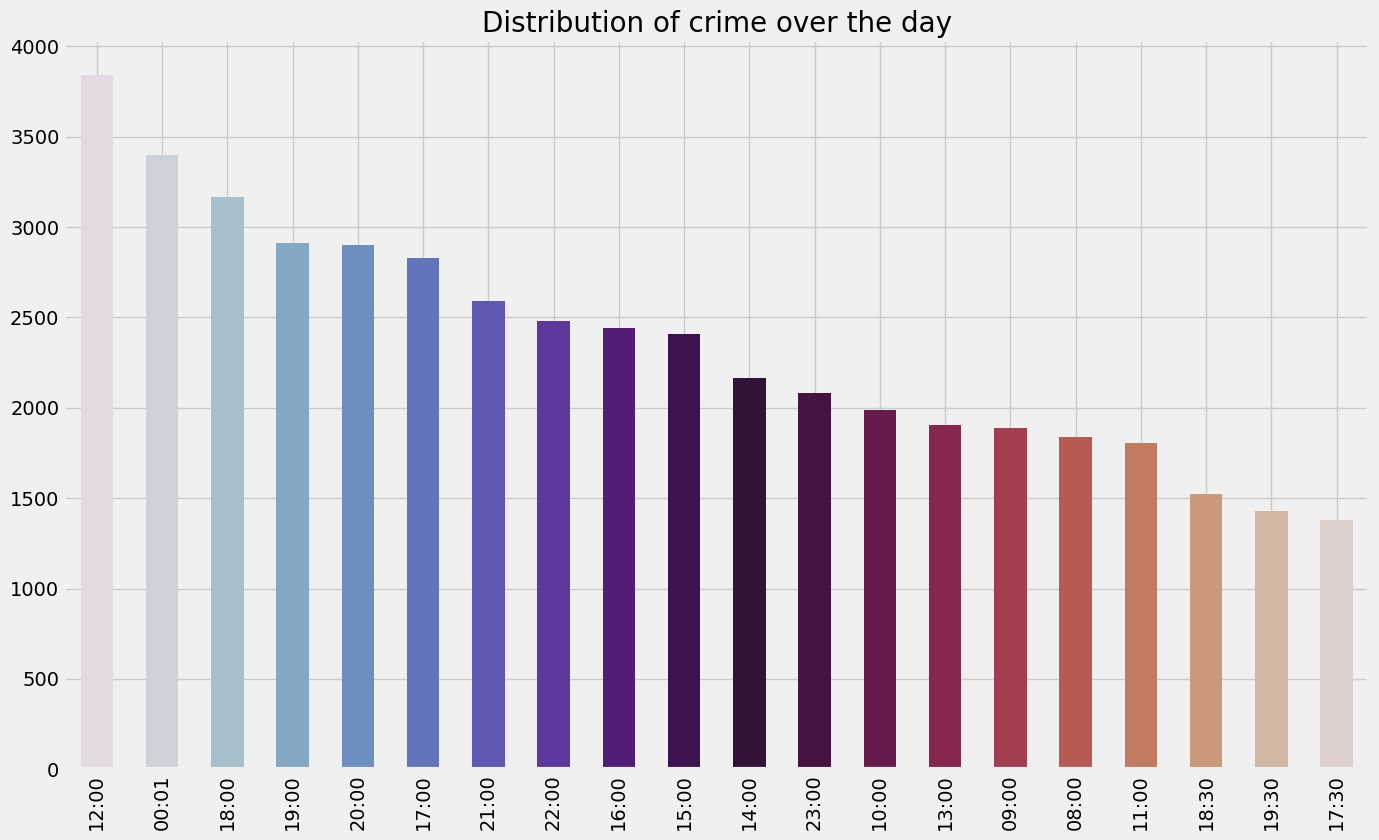

In [30]:
color = plt.cm.twilight(np.linspace(0, 5, 100))
data['Time'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

### District vs Category of Crime

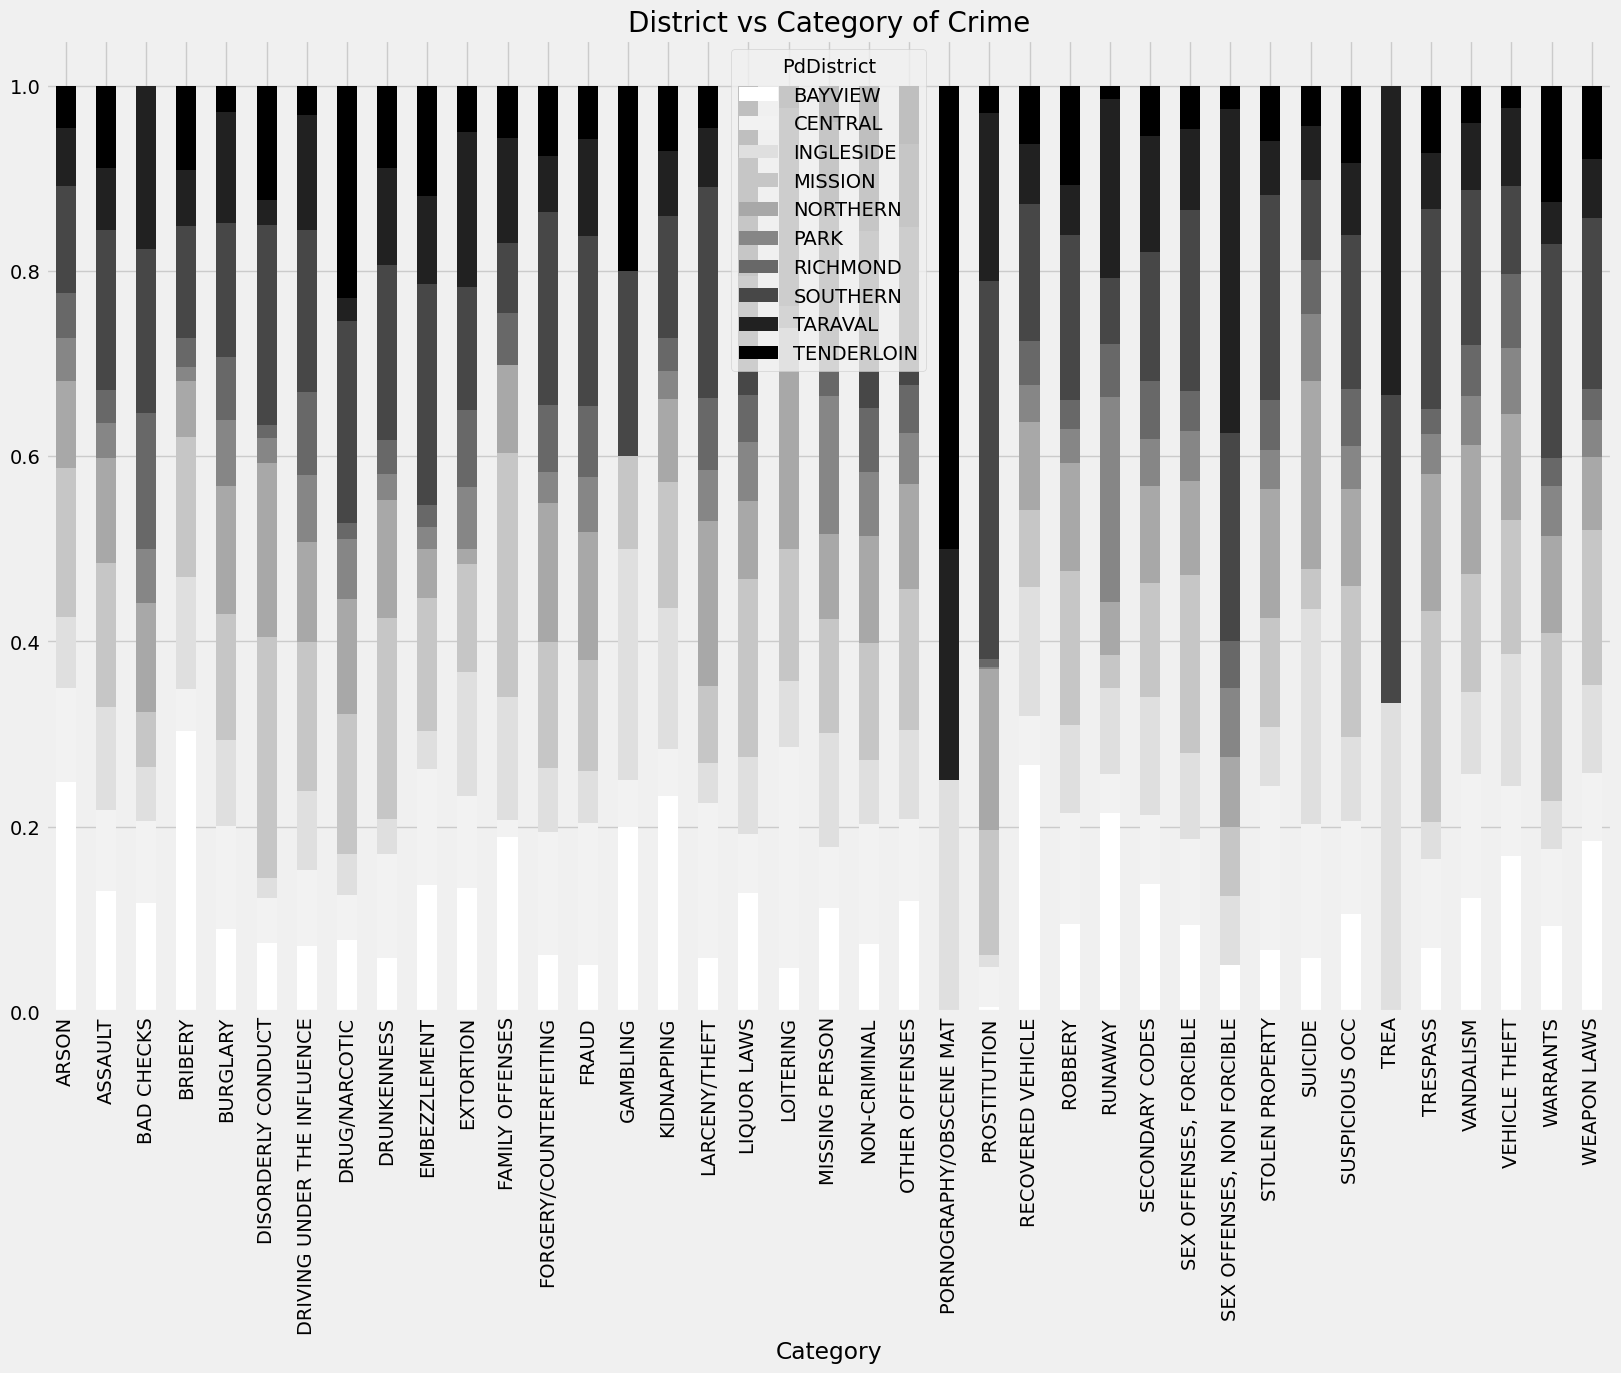

In [33]:
df = pd.crosstab(data['Category'], data['PdDistrict'])
color = plt.cm.Greys(np.linspace(0, 1, 10))

df.div(df.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

### Geographical Visualization

In [34]:
t = data.PdDistrict.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28446
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In [35]:
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

### Density of crime in San Francisco

In [37]:
# Add choropleth layer
folium.Choropleth(
    geo_data=gjson,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
).add_to(sf_map)

# Display the map
sf_map